***** Part 1 ***

### DOMAIN: Botanical research
#### CONTEXT: University X is currently undergoing some research involving understanding the characteristics of 
plant and plant seedlings at various stages of growth. They already have have invested on curating sample 
images. They require an automation which can create a classifier capable of determining a plant's species from a 
photo
#### DATA DESCRIPTION: The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/
plant-seedlings-classification/data
#### PROJECT OBJECTIVE: University’s management require an automation which can create a classifier capable of 
determining a plant's species from a photo
Steps and tasks: [ Total Score: 20 points]
1. Import the data. Analyse the dimensions of the data. Visualise the data.
2. Train tune and test AIML image classifier model using:
• Use supervised learning algorithms for training
• Use neural networks for training
• Use CNN for training
3. Compare the results from the above step along with your detailed observations. 
4. Pickle the best performing model.
5. Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image 
classifier model to predict the class

In [22]:
#import library
from google.colab import drive
import os
import matplotlib.pyplot as plt
import cv2
import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [23]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.5.0'

In [24]:
#mount google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
#Checking the contents of shared folder
os.listdir("/content/gdrive/MyDrive/Part-1 - Plant Seedling Classification Data")

['Seedling - Prediction', 'train']

In [26]:
#Checking the contents of train folder
train_folder_loc="/content/gdrive/MyDrive/Part-1 - Plant Seedling Classification Data/train"
classes=os.listdir(train_folder_loc)

#Get the seedling class from folder name
plan_seedling_label=classes

In [27]:
#read, resize imgaes from training folder
x_feature,y_feature=[],[]
for clas in classes:
  print(clas)
  path=os.path.join(train_folder_loc,clas)
  for img in os.listdir(path):
    img=os.path.join(path,img)
    img_cv2 = cv2.imread(img)
    img_resize = cv2.resize(img_cv2, (64, 64))
    x_feature.append(img_resize)
    y_feature.append(str(clas))

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


In [41]:
y_feature

['Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-grass',
 'Black-

In [ ]:
#checking X-feature
len(x_feature)

4767

In [ ]:
#checking unique feature
np.unique(y_feature)

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

(64, 64, 3)
summary: images have 3 channels


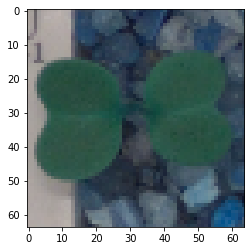

In [ ]:
#Checking imgaes
plt.imshow(x_feature[500])
#check shape of images
print(x_feature[1].shape)
print("summary: images have 3 channels")

### Normalize values

In [ ]:
x_train_data = np.array(x_feature, np.float32) / 255.   # /= 255 for normalisation
print (x_train_data.shape)

(4767, 64, 64, 3)


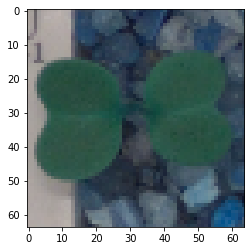

In [ ]:
#Checking imgaes
plt.imshow(x_train_data[500])

In [ ]:
#Use keras.utils.to_categorical function for labels
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_feature)
# print(integer_encoded)

y_train = to_categorical(integer_encoded,num_classes=12)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (4767, 12)
One value of y_train: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [69]:
from sklearn import preprocessing
prediction_decoded = label_encoder.inverse_transform(integer_encoded)
print(prediction_decoded)

['Black-grass' 'Black-grass' 'Black-grass' ... 'Sugar beet' 'Sugar beet'
 'Sugar beet']


In [42]:
integer_encoded

array([ 0,  0,  0, ..., 11, 11, 11])

In [ ]:
print("Shape of x_train:", x_train_data.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (4767, 64, 64, 3)
Shape of y_train: (4767, 12)


In [ ]:
#split data into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train_data, y_train, test_size=0.33, random_state=42)

In [ ]:
print("X_train1 shape",X_train1.shape)
print("X_test1 shape",X_test1.shape)
print("y_train1 shape",y_train1.shape)
print("y_test1 shape",y_test1.shape)

X_train1 shape (3193, 64, 64, 3)
X_test1 shape (1574, 64, 64, 3)
y_train1 shape (3193, 12)
y_test1 shape (1574, 12)


In [45]:
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm=train_test_split(x_train_data,integer_encoded,test_size=0.33, random_state=42)

In [46]:
# Changing dimensions to N x D = 28x28
# Number of samples you want in training data. 60,000 is max.
x_tr = []
for i in range(3193):
    x_tr.append(X_trainsvm[i,:].flatten())
x_te = []
for i in range(1574):
    x_te.append(X_testsvm[i,:].flatten())

In [85]:
x_tr[0]

array([0.13333334, 0.21568628, 0.29411766, ..., 0.10196079, 0.23137255,
       0.3764706 ], dtype=float32)

In [47]:
print(len(x_tr),len(x_tr[0]))
print(len(x_te),len(x_te[0]))

3193 12288
1574 12288


In [ ]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [51]:
model_rf=SVC()
model_rf.fit(x_tr,y_trainsvm)
score = round(model_rf.score(x_tr,y_trainsvm), 3) 
print(score)


0.834


In [52]:
test_score = round(model_rf.score(x_te, y_testsvm), 3) 
print(test_score)

0.482


[6]


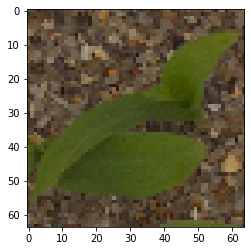

In [86]:
import pickle
filename = '/content/gdrive/MyDrive'+'/models/'+'svm_model.sav'
pickle.dump(model_rf, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
img = image.load_img('/content/gdrive/MyDrive'+'/models/'+'Predict.png', target_size=(64,64,3))
x = image.img_to_array(img)
x1=x.flatten()
# result = loaded_model.predict(x1)


# x = image.img_to_array(img)
x1 = np.expand_dims(x1, axis=0)
img1 = np.reshape(img,[1,64,64,3])
score= loaded_model.predict(x1)
print(score)
plt.imshow(img)


### Neural Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras import initializers, optimizers,callbacks

In [88]:
model_nn= Sequential()
model_nn.add(Flatten())
model_nn.add(Dense(activation = 'relu', input_dim = (64, 64, 3), units=256))
model_nn.add(BatchNormalization())
model_nn.add(Dense(activation = 'relu', units=256))
model_nn.add(BatchNormalization())
model_nn.add(Dense(activation = 'relu', units=128))
model_nn.add(BatchNormalization())
model_nn.add(Dense(activation = 'relu', units=32))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.5))
# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_nn.add(tensorflow.keras.layers.Dense(12, activation="softmax"))

In [89]:
X_train2 = X_train1.reshape(X_train1.shape[0], 64, 64, 3)
X_test2 = X_test1.reshape(X_test1.shape[0], 64, 64, 3)

In [90]:
X_train2[0].shape

(64, 64, 3)

In [91]:
model_nn.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers.SGD(lr=0.01))
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
# # Fit the mod
history=model_nn.fit(x=X_train2, y=y_train1, batch_size=32, epochs=25, validation_data=(X_test2, y_test1),callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
100/100 [==============================] - 3s 13ms/step - loss: 2.9484 - accuracy: 0.1600 - val_loss: 2.6206 - val_accuracy: 0.0845
Epoch 2/25
100/100 [==============================] - 1s 9ms/step - loss: 2.3333 - accuracy: 0.2578 - val_loss: 2.2181 - val_accuracy: 0.2732
Epoch 3/25
100/100 [==============================] - 1s 9ms/step - loss: 1.9959 - accuracy: 0.3436 - val_loss: 2.1493 - val_accuracy: 0.2421
Epoch 4/25
100/100 [==============================] - 1s 10ms/step - loss: 1.7526 - accuracy: 0.4178 - val_loss: 2.4353 - val_accuracy: 0.2046
Epoch 5/25
100/100 [==============================] - 1s 9ms/step - loss: 1.5736 - accuracy: 0.4760 - val_loss: 2.6351 - val_accuracy: 0.1849
Epoch 6/25
100/100 [==============================] - 1s 10ms/step - loss: 1.4506 - accuracy: 0.5111 - val_loss: 2.2739 - val_accuracy: 0.2878
Epoch 7/25
100/100 [==============================] - 1s 9ms/step - loss: 1.3566 - accuracy: 0.5443 - val_loss: 1.8728 - val_accuracy: 0.3634
Epo

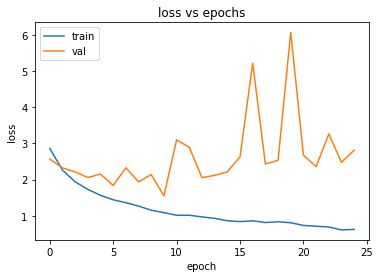

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

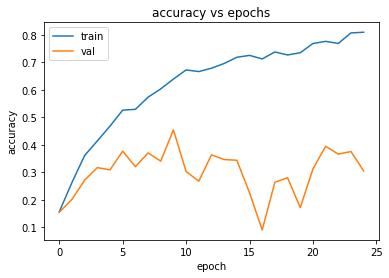

In [ ]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Convolution filter

In [31]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

model_convd = Sequential()
model_convd.add(Conv2D( filters=64, kernel_size=5, activation="relu", input_shape=(64, 64, 3)))
# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model_convd.add(MaxPooling2D(pool_size=(2, 2)))
model_convd.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'))
# Add a MaxPooling Layer of size 2X2 
model_convd.add(MaxPooling2D(pool_size=(1, 1)))
# Apply Dropout with 0.2 probability 
model_convd.add(Dropout(rate=0.2))
# Flatten the layer
model_convd.add(Flatten())
# Add Fully Connected Layer with 128 units and activation function as 'relu'
model_convd.add(Dense(128, activation="relu"))
#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model_convd.add(Dense(12, activation="softmax"))
model_convd.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [96]:
model_convd.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers.SGD(lr=0.001))
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
# # Fit the mod
history=model_convd.fit(x=X_train2, y=y_train1, batch_size=32, epochs=25, validation_data=(X_test2, y_test1),callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
100/100 [==============================] - 2s 18ms/step - loss: 0.1921 - accuracy: 0.9502 - val_loss: 0.9946 - val_accuracy: 0.7071
Epoch 2/25
100/100 [==============================] - 2s 16ms/step - loss: 0.1880 - accuracy: 0.9530 - val_loss: 1.0074 - val_accuracy: 0.7052
Epoch 3/25
100/100 [==============================] - 2s 16ms/step - loss: 0.1852 - accuracy: 0.9530 - val_loss: 0.9966 - val_accuracy: 0.7014
Epoch 4/25
100/100 [==============================] - 2s 15ms/step - loss: 0.1845 - accuracy: 0.9524 - val_loss: 1.0032 - val_accuracy: 0.7039
Epoch 5/25
100/100 [==============================] - 2s 15ms/step - loss: 0.1839 - accuracy: 0.9486 - val_loss: 1.0074 - val_accuracy: 0.7058
Epoch 6/25
100/100 [==============================] - 2s 16ms/step - loss: 0.1782 - accuracy: 0.9590 - val_loss: 1.0038 - val_accuracy: 0.7039
Epoch 7/25
100/100 [==============================] - 2s 16ms/step - loss: 0.1784 - accuracy: 0.9546 - val_loss: 1.0070 - val_accuracy: 0.7014

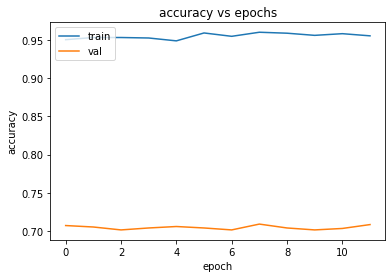

In [97]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Save model

In [102]:
model_convd.save('/content/gdrive/MyDrive'+'/models/'+'seedling_tf_model.h5')
print("Saved model to disk")

Saved model to disk


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


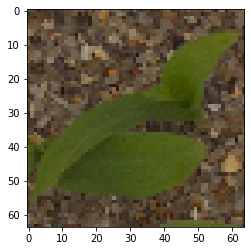

In [103]:
from keras.preprocessing import image
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(suppress=True)
img = image.load_img('/content/gdrive/MyDrive'+'/models/'+'Predict.png', target_size=(64,64,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img1 = np.reshape(img,[1,64,64,3])
score= model_convd.predict(img1)
print(score)
plt.imshow(img)


Summary:
1. Tried supervised Learning model,ANN and CNN
2. SL model with SVM gives good accuracy on train data but on test data
3. ANN model is not performing well compared SVM and CNN.
4. With CNN architecture, model shows improved performance with train wth train data 95% and test 70% accuracy.
5. Model shows overfitting. this can be impoved by data augmentation

### *** Part 2 ***

In [ ]:
 TASK: Explain in depth why CNN out performs neural networks which in turn out perform supervised learning 
models when it comes to image classification. Use the markdown option in Jupiter for your answer

### Summary :
1. Convolution is more powerful on images due to its conv filters which allows to pass the image without destructing its structure.
2. Conv filters applied on images hold the spatial information of the pattern they represent in a similar manner to the spatial structure of the input image. which gets destructed in ANN due to flattening of images
3. Share the same parameters across different locations of image pixels


#### Maintaining the spatial information of the Image:
1. IN ANN we cant pass the image as it is, it requires an image to be flatten into a vector, and then apply a fully connected linear combination + non-linear activation in a feed forward manner. 
2. In CNN, on the other hand, we can keep the original structure of the input image (e.g x,y structure of 2D image) and apply the filters on spatially-neighboring "pixels" across all axes. This is what allows CNN to identify spatial patterns (edges, shading changes, shapes, objects, …).
 

### Pooling layers : 
1. Pooling layes, in CNN,reduces the size of the output and requires no added parameters to learn, so pooling layers regulate the size of the network and keep the system below a computational limit.
2. This looses some spatial information as we max/average pooling, rather than pass it full details from filters.

### Shared Weights: 
1. This is the concept that makes CNNs "convolutional." By forcing the neurons of one layer to share weights, the forward pass (feeding data through the network) becomes the equivalent of convolving a filter over the image to produce a new image. The training of CNNs then becomes the task of learning filters (deciding what features you should look for in the data.)
2. Parameter sharing occurs when a feature map is generated from the result of the convolution between a filter and input data from a unit within a plane in the conv layer. All units within this layer plane share the same weights; hence it is called weight/parameter sharing.

### **** Part 3 ****

### DOMAIN: Automobile
### CONTEXT: A brand research company wants to understand which cars or car manufacturers are popular in a 
certain area of the city or locality. Company has a team which takes pictures of the cars randomly through the 
day. Using this the company wants to set up an automation which can classify the make of the car once the 
picture has been given as an input. 
### TASK: Help to build the image dataset to be used by the AI team to build an image classifier data. Import and 
display the images in python against their labels. Comment on the challenges faced during this task.
Hint: An image classifier data requires images as data and their tags/labels/class to which they belon

In [5]:
import tensorflow
tensorflow.__version__
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
labels = pd.read_csv('./car_images_label.csv')
labels.head()

Image     Make Colour    Type
0  00001.jpg     Audi  white   Sedan
1  00002.jpg    Acura  black   Sedan
2  00003.jpg    Dodge    red  Pickup
3  00004.jpg  Hyundai    red   Sedan
4  00005.jpg     Ford  white  Pickup

## create labels data for images

In [7]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [8]:
## Creating numpy array
X_feature=[]
y_make_feature=[]
y_colour_feature=[]
y_type_feature=[]
for index, row in labels.iterrows():
    X_feature.append(mpimg.imread(os.getcwd()+'/Cars Images/'+row['Image']))
    y_make_feature.append(row['Make'])
    y_colour_feature.append(row['Colour'])
    y_type_feature.append(row['Type'])

Summary : Created an array for images names and its features

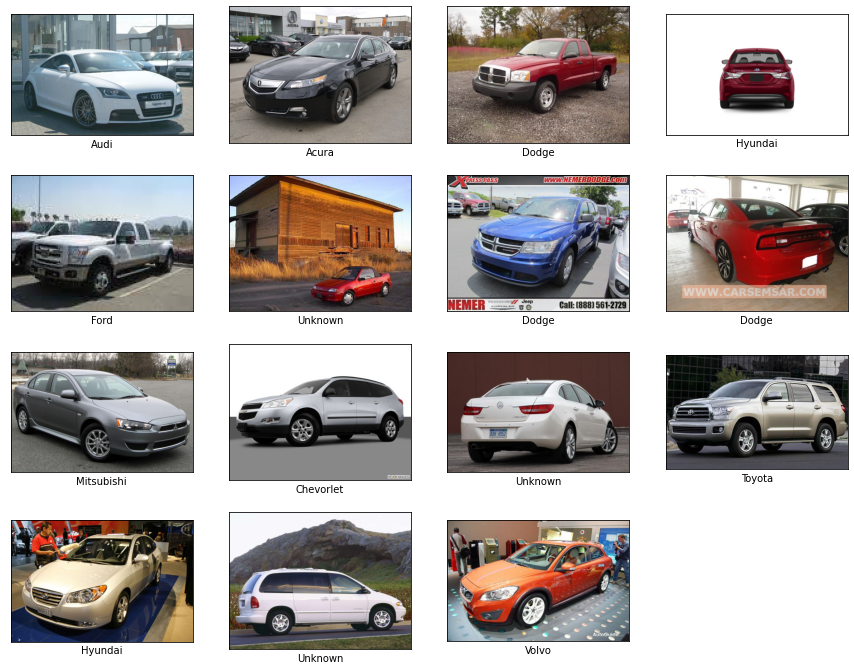

In [9]:
#display images and its make
plt.figure(figsize=(15,15)) # plot 25 images
for i in range(15):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_feature[i])
    plt.xlabel(y_make_feature[i])

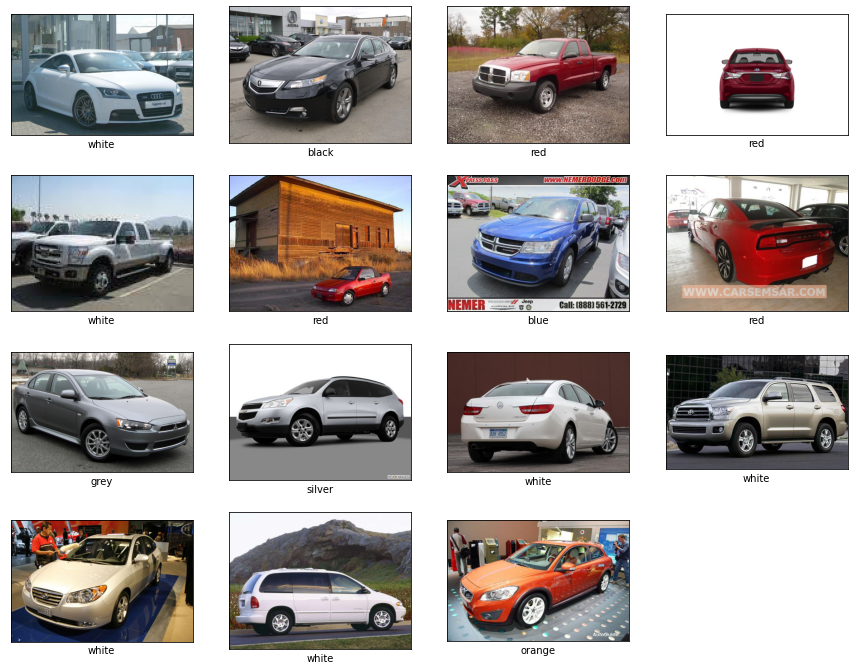

In [10]:
## Display images and its colour
plt.figure(figsize=(15,15)) # plot 25 images
for i in range(15):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_feature[i])
    plt.xlabel(y_colour_feature[i])

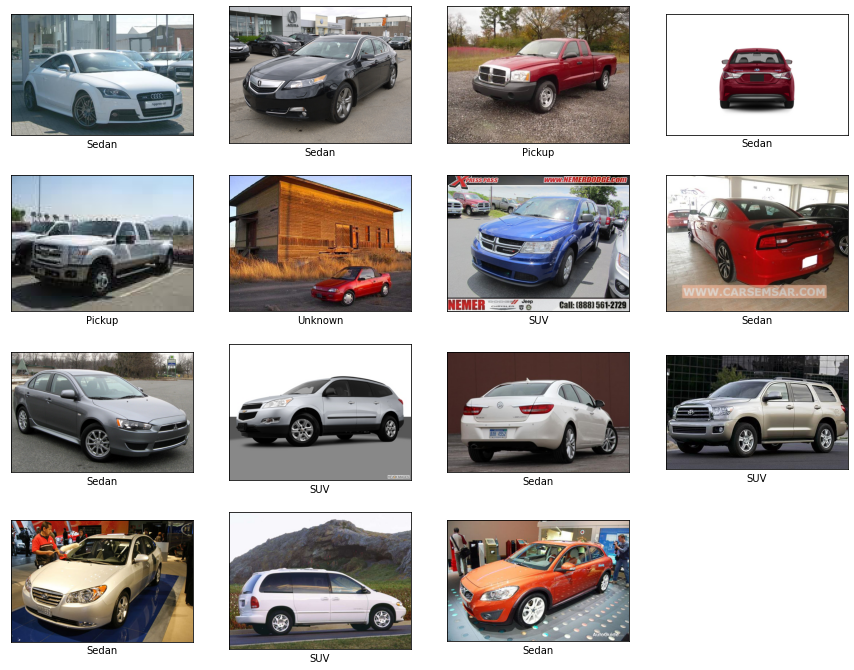

In [11]:
#Display car and its type
plt.figure(figsize=(15,15)) # plot 25 images
for i in range(15):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_feature[i])
    plt.xlabel(y_type_feature[i])

### **** Part 4 ****

#### DOMAIN: Botanical research
#### CONTEXT: 
University X is currently undergoing some research involving understanding the characteristics of flowers. They already have have invested on curating sample images. They require an automation which can 
create a classifier capable of determining a flower’s species from a photo
#### DATA DESCRIPTION: 
The dataset comprises of images from 17 plant species. It can be downloaded from 
TensorFlow [ Hint: import tflearn.datasets.oxflower17 as oxflower17 ]
#### PROJECT OBJECTIVE: 
Company’s management requires an automation which can create a classifier capable of 
determining a flower’s species from a photo

#!pip install tensorflow-datasets
#!pip install tflearn

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.36.1
    Uninstalling grpcio-1.36.1:
      Successfully uninstalled grpcio-1.36.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\rajhi\\anaconda3\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.



In [ ]:
!pip install tflearn

     |████████████████████████████████| 112kB 7.0MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=b79798fbe775d6b561f74f902019d1deb5dabc482176164282818b86ede618a5
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


### step 1 : import library

In [ ]:
import tensorflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds #not available here
import tflearn
import matplotlib.pyplot as plt
import tflearn.datasets.oxflower17 as oxflower17
from PIL import Image, ImageFilter
import math
import cv2
from sklearn.svm import SVC
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten, Dense,Activation,GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras import initializers, optimizers,callbacks, regularizers
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D
from keras import Input

### step 2: Load flower Data

In [ ]:
X, Y = oxflower17.load_data(one_hot=False)

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [ ]:
#check shape of X and y
print("Details of Images (X):",X.shape, type(X), X.size)
print("Details of Labels(Y):", Y.shape, type(Y), Y.size, np.unique(Y))

Details of Images (X): (1360, 224, 224, 3) <class 'numpy.ndarray'> 204718080
Details of Labels(Y): (1360,) <class 'numpy.ndarray'> 1360 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [ ]:
#checking Y
Y

array([ 3, 16,  2, ...,  8, 10,  8])

Summary : 
1. There are 1360 images
2. All images are of same size ( 224,224)
3. Images have 3 channels ( R,G,B) 

### step 2.1 : check images

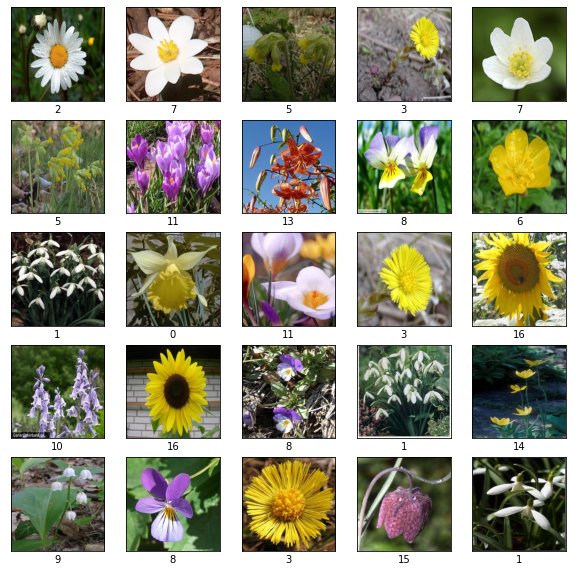

In [ ]:
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(Y[i])

### Step 3 : Image Processing and transformation

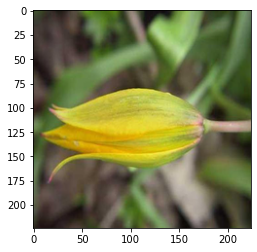

0.03529412
0.73333335


In [ ]:
image=X[100]
plt.imshow(image)
plt.show()
image[0]
## these images are normalised a
print(np.min(image[0]))
print(np.max(image[0]))

Summary : as pixel values of images varies from 0-1, these images looks like they are already normalized

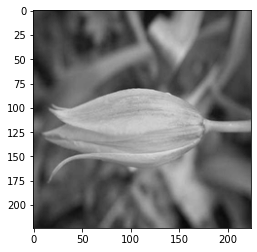

In [ ]:
## colour schema of OPEN CV is BGR and matplotlib is RGB
import matplotlib.image as mpimg
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

test_image=X[100].copy()
gray = rgb2gray(test_image)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

### Step 3.1: Code for Image Convolution from scratch for grey images

In [ ]:
def convert_image_matrix(img_name):
    gray_img = rgb2gray(img_name)  
    gimg_shape = gray_img.shape
    gimg_mat = []
    for i in range(0, gimg_shape[0]):
        row = []
        for j in range(0, gimg_shape[1]):
            pixel = gray_img.item(i, j)
            row.append(pixel)
        gimg_mat.append(row)
    gimg_mat = np.array(gimg_mat)
    return gimg_mat

#Convert original image matrix to matrix containing sub-matrices of size kernel from the original matrix.

def get_sub_matrices(orig_matrix, kernel_size):
    width = len(orig_matrix[0])
    height = len(orig_matrix)
    if kernel_size[0] == kernel_size[1]:
        if kernel_size[0] > 2:
            orig_matrix = np.pad(orig_matrix, kernel_size[0] - 2, mode='constant')
        else: pass
    else: pass
    
    giant_matrix = []
    for i in range(0, height - kernel_size[1] + 1):
        for j in range(0, width - kernel_size[0] + 1):
            giant_matrix.append(
                [
                    [orig_matrix[col][row] for row in range(j, j + kernel_size[0])]
                    for col in range(i, i + kernel_size[1])
                ]
            )
    img_sampling = np.array(giant_matrix)
    return img_sampling

def get_transformed_matrix(matrix_sampling, kernel_filter):
    transform_mat = []
    for each_mat in matrix_sampling:
        transform_mat.append(
            np.sum(np.multiply(each_mat, kernel_filter))
        )
    reshape_val = int(math.sqrt(matrix_sampling.shape[0]))
    transform_mat = np.array(transform_mat).reshape(reshape_val, reshape_val)
    return transform_mat

def original_VS_convoluted1(img_name, gray_img,kernel_name, convoluted_matrix):
    org_name= img_name
    conv=convoluted_matrix
    
    fig = plt.figure(figsize=(16, 25))
    ax1 = fig.add_subplot(1,3,1)
    ax1.axis("off")
    ax1.title.set_text('Original')
    ax1.imshow(org_name)

    ax2 = fig.add_subplot(1,3,2)
    ax2.axis("off")
    ax2.title.set_text('Gray')
    ax2.imshow(gray_img,cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    
    ax3 = fig.add_subplot(1,3,3)
    ax3.axis("off")
    ax3.title.set_text(str(kernel_name).title())
    ax3.imshow(conv,cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    
    return True

True

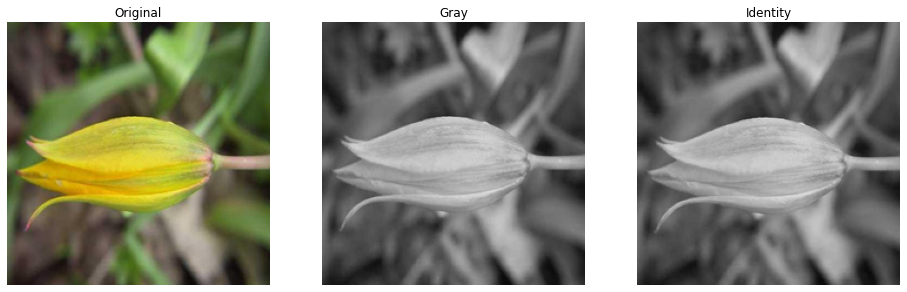

In [ ]:
img_name = X[100]
img_mat = convert_image_matrix(img_name)
identity_kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])
img_sampling = get_sub_matrices(img_mat, identity_kernel.shape)
transform_mat = get_transformed_matrix(img_sampling, identity_kernel)
original_VS_convoluted1(img_name,img_mat,'identity', transform_mat)

True

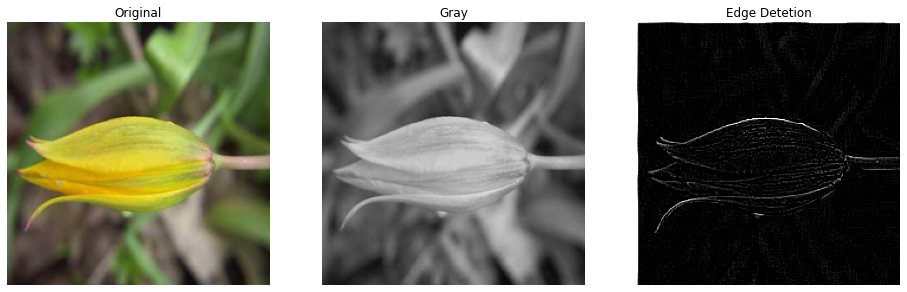

In [ ]:
img_name = X[100]
img_mat = convert_image_matrix(img_name)
identity_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
img_sampling = get_sub_matrices(img_mat, identity_kernel.shape)
transform_mat = get_transformed_matrix(img_sampling, identity_kernel)
original_VS_convoluted1(img_name,img_mat,'Edge Detetion', transform_mat)

True

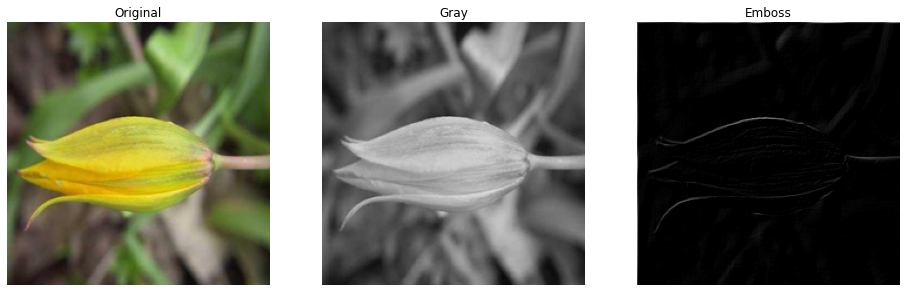

In [ ]:
img_name = X[100]
img_mat = convert_image_matrix(img_name)
identity_kernel = np.array([[-1, 0, 0], [0, 1, 0], [0, 0,0]])
img_sampling = get_sub_matrices(img_mat, identity_kernel.shape)
transform_mat = get_transformed_matrix(img_sampling, identity_kernel)
original_VS_convoluted1(img_name,img_mat,'Emboss', transform_mat)

True

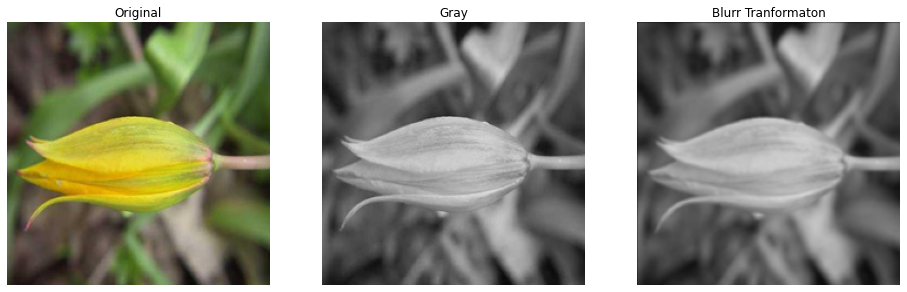

In [ ]:
img_name = X[100]
img_mat = convert_image_matrix(img_name)
identity_kernel = np.ones((3, 3), np.float)/(9.0)
img_sampling = get_sub_matrices(img_mat, identity_kernel.shape)
transform_mat = get_transformed_matrix(img_sampling, identity_kernel)
original_VS_convoluted1(img_name,img_mat,'Blurr Tranformaton', transform_mat)

### Step 3.2: Code for Image Convolution from scratch for colour images

In [ ]:
def convolution_on_colored_img(image,channel, kernel):
    data_channel=image[:,:,channel]
    img_sampling_channel=get_sub_matrices(data_channel,kernel.shape)
    transform_mat = get_transformed_matrix(img_sampling_channel, kernel)
    return transform_mat

def stack_conv_colour_image(image,channel,kernel_0,kernel_1,kernel_2):
    channels_det = []
    for channel in range(3):
        if channel==0:
            res_det = convolution_on_colored_img(image,channel, kernel_0)
            channels_det.append(res_det)
        elif channel==1:
            res_det = convolution_on_colored_img(image,channel, kernel_1)
            channels_det.append(res_det)
        else:
            res_det = convolution_on_colored_img(image,channel, kernel_2)
            channels_det.append(res_det)
    conv_img = np.dstack((channels_det[0], channels_det[1], channels_det[2]))
    return conv_img

True

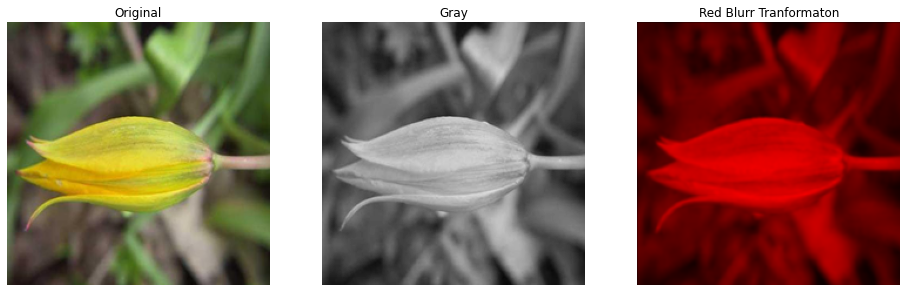

In [ ]:
kernel_0 = np.ones((3, 3), np.float)/(9.0)
kernel_1 =  np.zeros((3, 3), np.float)
kernel_2 =  np.zeros((3, 3), np.float)
image=X[100]
channel=3

colour_conv=stack_conv_colour_image(image,channel,kernel_0,kernel_1,kernel_2)
original_VS_convoluted1(img_name,img_mat,'Red Blurr Tranformaton', colour_conv)

True

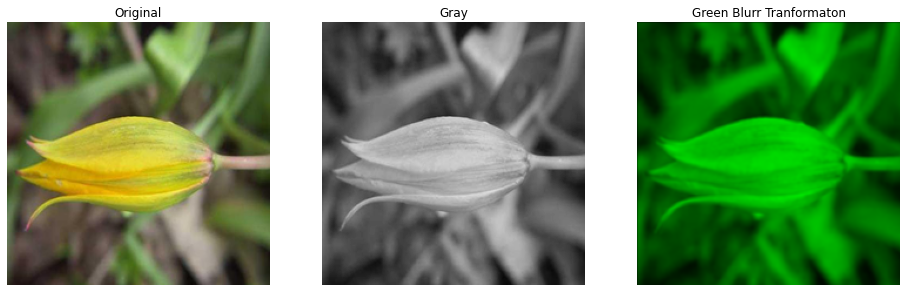

In [ ]:
kernel_0 =  np.zeros((3, 3), np.float)
kernel_1 =  np.ones((3, 3), np.float)/(9.0)
kernel_2 =  np.zeros((3, 3), np.float)
image=X[100]
channel=3

colour_conv=stack_conv_colour_image(image,channel,kernel_0,kernel_1,kernel_2)
original_VS_convoluted1(img_name,img_mat,'Green Blurr Tranformaton', colour_conv)

True

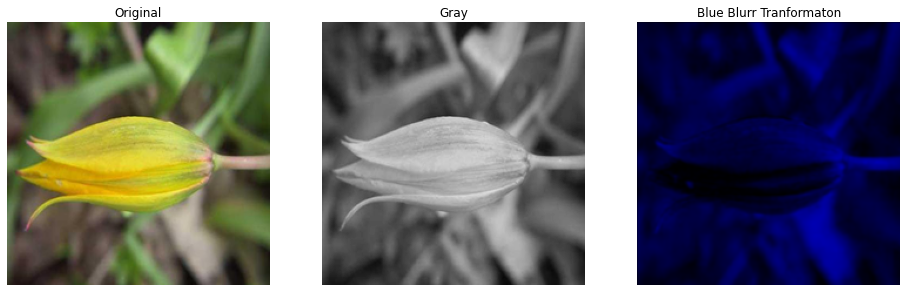

In [ ]:
kernel_0 = np.zeros((3, 3), np.float)
kernel_1 = np.zeros((3, 3), np.float)
kernel_2 = np.ones((3, 3), np.float)/(9.0)
image=X[100]
channel=3

colour_conv=stack_conv_colour_image(image,channel,kernel_0,kernel_1,kernel_2)
original_VS_convoluted1(img_name,img_mat,'Blue Blurr Tranformaton', colour_conv)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

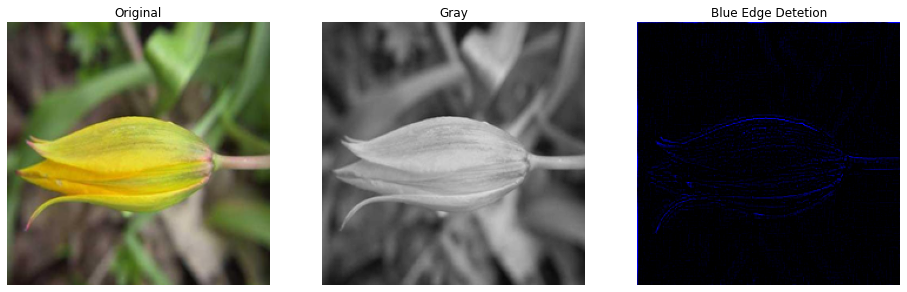

In [ ]:
kernel_0 = np.zeros((3, 3), np.float)
kernel_1 = np.zeros((3, 3), np.float)
kernel_2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],np.float)
image=X[100]
channel=3

colour_conv=stack_conv_colour_image(image,channel,kernel_0,kernel_1,kernel_2)
original_VS_convoluted1(img_name,img_mat,'Blue Edge Detetion', colour_conv)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

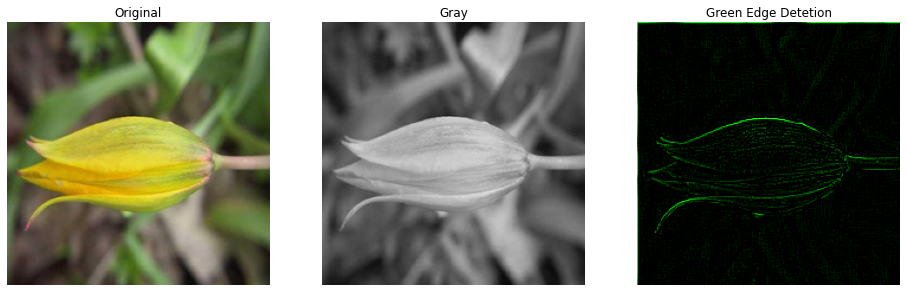

In [ ]:
kernel_0 = np.zeros((3, 3), np.float)
kernel_1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],np.float)
kernel_2 = np.zeros((3, 3), np.float)
image=X[100]
channel=3

colour_conv=stack_conv_colour_image(image,channel,kernel_0,kernel_1,kernel_2)
original_VS_convoluted1(img_name,img_mat,'Green Edge Detetion', colour_conv)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

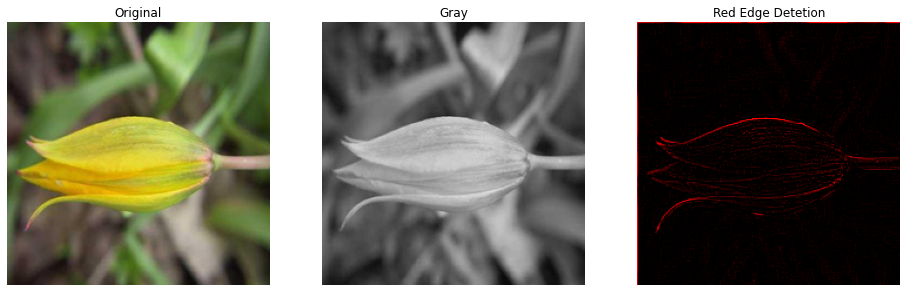

In [ ]:
kernel_0 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],np.float)
kernel_1 = np.zeros((3, 3), np.float)
kernel_2 = np.zeros((3, 3), np.float)
image=X[100]
channel=3

colour_conv=stack_conv_colour_image(image,channel,kernel_0,kernel_1,kernel_2)
original_VS_convoluted1(img_name,img_mat,'Red Edge Detetion', colour_conv)

### Step 3.3 : Image convolution with open cv

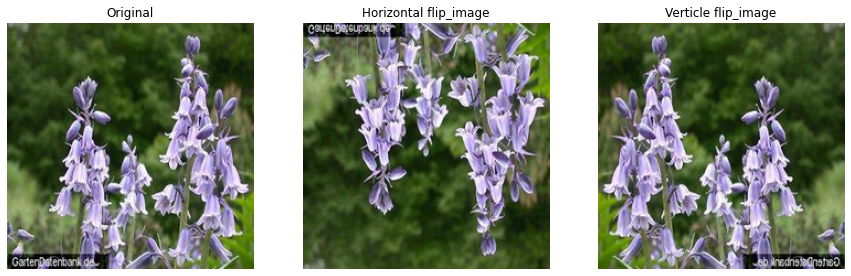

In [ ]:
## fliping images
test_image=X[15].copy()
fig = plt.figure(figsize=(15, 20))
ax1 = fig.add_subplot(1,3,1)
ax1.axis("off")
ax1.title.set_text('Original')
ax1.imshow(test_image)

ax2 = fig.add_subplot(1,3,2)
ax2.axis("off")
H_flip_image=cv2.flip(test_image, 0)
ax2.title.set_text('Horizontal flip_image')
ax2.imshow(H_flip_image)
    
ax3 = fig.add_subplot(1,3,3)
ax3.axis("off")
ax3.title.set_text('Verticle flip_image')
V_flip_image=cv2.flip(test_image, 1)
ax3.imshow(V_flip_image)

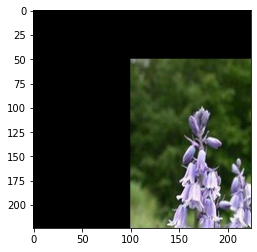

In [ ]:
#image translation
rows= test_image.shape[0]
cols= test_image.shape[1]
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(test_image,M,(cols,rows))
plt.imshow(dst)

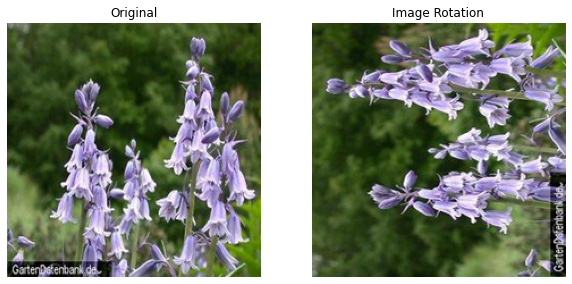

In [ ]:
test_image=X[15].copy()
rows= test_image.shape[0]
cols= test_image.shape[1] 
# cols-1 and rows-1 are the coordinate limits.
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv2.warpAffine(test_image,M,(cols,rows))

fig = plt.figure(figsize=(10, 20))
ax1 = fig.add_subplot(1,2,1)
ax1.axis("off")
ax1.title.set_text('Original')
ax1.imshow(test_image)

ax2 = fig.add_subplot(1,2,2)
ax2.axis("off")
ax2.title.set_text('Image Rotation')
ax2.imshow(dst)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(112, 112, 3)


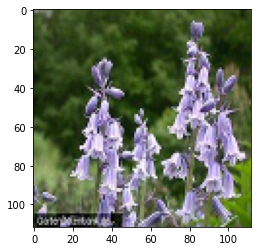

In [ ]:
res = cv2.resize(test_image,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
print(res.shape)

### Step 4: Model Training

In [ ]:
X_train, X_test, y_train,y_test=train_test_split(X, Y,test_size=0.3, random_state=4)
X_train.shape

(952, 224, 224, 3)

In [ ]:
y_train

array([ 5, 13,  3,  9, 14, 15, 14,  7,  5,  1,  7, 16,  4, 13,  9, 13,  1,
        6, 16, 10,  0, 14,  2,  3,  4, 15,  0,  9,  2, 10,  7,  6,  3, 15,
       10,  5,  6,  5,  4, 12, 13,  8, 10,  8, 15,  6,  7, 11, 10,  0,  2,
        8,  7, 10,  6, 13,  7,  0,  0,  3,  4, 10,  5,  4, 11,  6,  7,  5,
        8,  8,  1,  4, 11,  8, 10,  4, 13, 15,  1,  7,  9,  7,  8, 13,  9,
        4,  4, 16, 13,  3,  5, 12,  7, 13,  8,  3, 15, 13,  1, 16, 16,  5,
       15,  7,  3,  8,  6,  7, 11,  7, 13, 10, 15,  7,  2,  2,  4,  9, 11,
       15,  8,  7,  6, 11,  2, 15,  5,  9,  0,  7,  5,  6,  1,  0,  5,  1,
       11,  5, 11,  7, 12,  8,  2,  2,  4, 10, 16,  1,  7,  5,  3,  3,  5,
        7, 13, 12,  6,  1,  1,  4, 16,  9, 13, 13, 14,  8, 15, 16,  3,  6,
       12, 13, 14,  8, 11, 13,  1, 12,  5,  7, 10,  6, 10, 13, 11,  5, 13,
        0, 14,  3,  1,  5,  0,  1,  8,  4,  0,  7,  2, 12,  4,  5, 16,  2,
        3,  3, 12,  9,  0,  4,  7,  1,  2,  4,  2, 10, 14,  5, 11, 12,  1,
       16, 12,  9,  0, 11

### Step 4.1: Supervised Learning

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(952, 224, 224, 3)
(952,)
(408, 224, 224, 3)
(408,)


In [ ]:
## Converting target variable to categorical
from tensorflow.keras.utils import to_categorical
y_tr = to_categorical(y_train, num_classes=None, dtype='int')
y_te = to_categorical(y_test, num_classes=None, dtype='int')
print(y_tr.shape)
print(y_te.shape)

(952, 17)
(408, 17)


In [ ]:
## For supervised learning need to flattend train and test features
x_tr = []
for i in range(len(X_train)):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(len(X_test)):
    x_te.append(X_test[i,:].flatten())

In [ ]:
model_rf=SVC()
model_rf.fit(x_tr,y_train)
train_score = round(model_rf.score(x_tr,y_train), 3) 
print(train_score)
test_score = round(model_rf.score(x_te, y_test), 3) 
print(test_score)

0.915
0.537


### Step 4.2: Neural Network- ANN

In [ ]:
model_nn= Sequential()
model_nn.add(Flatten())
model_nn.add(Dense(activation = 'relu', input_dim = (224, 224, 3), units=210))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.5))
model_nn.add(Dense(activation = 'relu', input_dim = 210, units=128))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.5))
model_nn.add(Dense(activation = 'relu', input_dim = 128, units=128))
model_nn.add(BatchNormalization())
# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_nn.add(tensorflow.keras.layers.Dense(17, activation="softmax"))

In [ ]:
model_nn.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers.Adam(lr=0.01))
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
# # Fit the mod
history=model_nn.fit(x=X_train, y=y_tr, batch_size=32, epochs=25, validation_data=(X_test, y_te),callbacks=[callback])

C:\Users\rajhi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Instructions for updating:
Colocations handled automatically by placer.
Train on 952 samples, validate on 408 samples
Epoch 1/25
952/952 [==============================] - ETA: 0s - loss: 3.0180 - acc: 0.1313

C:\Users\rajhi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


952/952 [==============================] - 15s 15ms/sample - loss: 3.0180 - acc: 0.1313 - val_loss: 23.3953 - val_acc: 0.1103
Epoch 2/25
952/952 [==============================] - 6s 6ms/sample - loss: 2.5594 - acc: 0.1754 - val_loss: 7.3656 - val_acc: 0.1593
Epoch 3/25
952/952 [==============================] - 6s 6ms/sample - loss: 2.3190 - acc: 0.2479 - val_loss: 4.3375 - val_acc: 0.1520
Epoch 4/25
952/952 [==============================] - 6s 7ms/sample - loss: 2.2502 - acc: 0.2353 - val_loss: 2.9833 - val_acc: 0.2059
Epoch 5/25
952/952 [==============================] - 6s 6ms/sample - loss: 2.1430 - acc: 0.2637 - val_loss: 2.3491 - val_acc: 0.2696
Epoch 6/25
952/952 [==============================] - 6s 6ms/sample - loss: 2.0125 - acc: 0.3088 - val_loss: 1.9311 - val_acc: 0.3775
Epoch 7/25
952/952 [==============================] - 6s 7ms/sample - loss: 1.9893 - acc: 0.3172 - val_loss: 2.5311 - val_acc: 0.2745
Epoch 8/25
952/952 [==============================] - 7s 7ms/sample - 

In [ ]:
score = model_nn.evaluate(X_train, y_tr, verbose=0)
print("training_accuracy",score)
score = model_nn.evaluate(X_test, y_te, verbose=0)
print("test_accuracy",score)

training_accuracy [0.9490396705996088, 0.6922269]
test_accuracy [1.7794628049813064, 0.40441176]


####  Summary: Getting accuracy of 40% on validation with ANN

### Step 4.3 : CNN Netwrok from scratch

In [ ]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

In [ ]:
model_convd = Sequential()
##passing the coloured image of size 224*224
model_convd.add(Conv2D( filters=64, kernel_size=5, activation="relu", input_shape=(224, 224, 3)))
# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model_convd.add(MaxPooling2D(pool_size=(2, 2)))
model_convd.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'))
# Add a MaxPooling Layer of size 2X2 
model_convd.add(MaxPooling2D(pool_size=(1, 1)))
# Apply Dropout with 0.2 probability 
model_convd.add(Dropout(rate=0.2))
# Flatten the layer
model_convd.add(Flatten())
# Add Fully Connected Layer with 128 units and activation function as 'relu'
model_convd.add(Dense(128, activation="relu"))
#Add Fully Connected Layer with 17 units and activation function as 'softmax'
model_convd.add(Dense(17, activation="softmax"))
model_convd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 387200)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
model_convd.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers.SGD(lr=0.01,momentum=0.001,nesterov=True))
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
# # Fit the mod
history=model_convd.fit(x=X_train, y=y_tr, batch_size=32, epochs=25, validation_data=(X_test, y_te),callbacks=[callback])

Train on 952 samples, validate on 408 samples
Epoch 1/25
952/952 [==============================] - 77s 81ms/sample - loss: 2.6704 - acc: 0.1418 - val_loss: 2.6518 - val_acc: 0.1667
Epoch 2/25
952/952 [==============================] - 72s 75ms/sample - loss: 2.2090 - acc: 0.2689 - val_loss: 2.2068 - val_acc: 0.2304
Epoch 3/25
952/952 [==============================] - 72s 75ms/sample - loss: 1.9260 - acc: 0.3498 - val_loss: 1.9292 - val_acc: 0.3897
Epoch 4/25
952/952 [==============================] - 71s 75ms/sample - loss: 1.7184 - acc: 0.4370 - val_loss: 1.7885 - val_acc: 0.3627
Epoch 5/25
952/952 [==============================] - 71s 75ms/sample - loss: 1.4857 - acc: 0.5221 - val_loss: 2.1421 - val_acc: 0.3333
Epoch 6/25
952/952 [==============================] - 71s 75ms/sample - loss: 1.3790 - acc: 0.5567 - val_loss: 2.0969 - val_acc: 0.3382
Epoch 7/25
952/952 [==============================] - 72s 76ms/sample - loss: 1.0562 - acc: 0.6670 - val_loss: 1.5614 - val_acc: 0.4853
Ep

In [ ]:
score = model_convd.evaluate(X_train, y_tr, verbose=0)
print("training_accuracy",score)
score = model_convd.evaluate(X_test, y_te, verbose=0)
print("test_accuracy",score)

training_accuracy [0.011332626438879665, 1.0]
test_accuracy [2.0013249995661715, 0.5588235]


#### Summary: Getting a bit improved accuracy of 55% on validation with CNN. CNN is showing overfitting

CNN with SVM

In [ ]:
model_convd_svm = Sequential()
model_convd_svm.add(Conv2D( filters=64, kernel_size=5, activation="relu", input_shape=(224, 224, 3)))
# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model_convd_svm.add(MaxPooling2D(pool_size=(2, 2)))
model_convd_svm.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'))
# Add a MaxPooling Layer of size 2X2 
model_convd_svm.add(MaxPooling2D(pool_size=(1, 1)))
# Apply Dropout with 0.2 probability 
model_convd_svm.add(Dropout(rate=0.2))
# Flatten the layer
model_convd_svm.add(Flatten())
# Add Fully Connected Layer with 128 units and activation function as 'relu'
model_convd_svm.add(Dense(128, activation="relu"))
## for mulitclassification
model_convd_svm.add(Dense(17, kernel_regularizer=regularizers.l2(0.1),activation='softmax'))


In [ ]:
model_convd_svm.compile(loss="squared_hinge", metrics=["accuracy"], optimizer=optimizers.SGD(lr=0.01))
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
# # Fit the mod
history=model_convd_svm.fit(x=X_train, y=y_tr, batch_size=32, epochs=25, validation_data=(X_test, y_te),callbacks=[callback])

Train on 952 samples, validate on 408 samples
Epoch 1/25
952/952 [==============================] - ETA: 0s - loss: 3.9194 - acc: 0.0662

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


952/952 [==============================] - 3s 3ms/sample - loss: 3.9194 - acc: 0.0662 - val_loss: 3.7472 - val_acc: 0.0686
Epoch 2/25
952/952 [==============================] - 3s 3ms/sample - loss: 3.6010 - acc: 0.0851 - val_loss: 3.4483 - val_acc: 0.0882
Epoch 3/25
952/952 [==============================] - 3s 3ms/sample - loss: 3.3186 - acc: 0.1250 - val_loss: 3.1832 - val_acc: 0.0931
Epoch 4/25
952/952 [==============================] - 3s 3ms/sample - loss: 3.0681 - acc: 0.1019 - val_loss: 2.9482 - val_acc: 0.0980
Epoch 5/25
952/952 [==============================] - 3s 3ms/sample - loss: 2.8461 - acc: 0.1113 - val_loss: 2.7397 - val_acc: 0.1029
Epoch 6/25
952/952 [==============================] - 3s 3ms/sample - loss: 2.6491 - acc: 0.1292 - val_loss: 2.5549 - val_acc: 0.1103
Epoch 7/25
952/952 [==============================] - 3s 3ms/sample - loss: 2.4745 - acc: 0.1208 - val_loss: 2.3910 - val_acc: 0.1078
Epoch 8/25
952/952 [==============================] - 3s 3ms/sample - los

### step 4.4: Transfer Learning

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
# load model without output layer
# add preprocessing layer to the front of VGG
conv_model = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
conv_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [12]:
for layer in conv_model.layers:
    layer.trainable = False

In [ ]:
# flatten the output of the convolutional part: 
x = Flatten()(conv_model.output)
# # three hidden layers
x = Dense(100, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(100, activation='relu')(x)
# final softmax layer with two categories (dog and cat)
predictions = Dense(17, activation='softmax')(x)

# creating the full model:
full_model = Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
full_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
# # Fit the mod
history=full_model.fit(x=X_train, y=y_tr, batch_size=32, epochs=25, validation_data=(X_test, y_te),callbacks=[callback])

Train on 952 samples, validate on 408 samples
Epoch 1/25
952/952 [==============================] - ETA: 0s - loss: 2.2476 - acc: 0.3130

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


952/952 [==============================] - 48s 50ms/sample - loss: 2.2476 - acc: 0.3130 - val_loss: 1.5386 - val_acc: 0.4804
Epoch 2/25
952/952 [==============================] - 5s 6ms/sample - loss: 0.8133 - acc: 0.7532 - val_loss: 0.9222 - val_acc: 0.7451
Epoch 3/25
952/952 [==============================] - 5s 6ms/sample - loss: 0.2278 - acc: 0.9485 - val_loss: 0.7915 - val_acc: 0.7353
Epoch 4/25
952/952 [==============================] - 6s 6ms/sample - loss: 0.0669 - acc: 0.9947 - val_loss: 0.5993 - val_acc: 0.8333
Epoch 5/25
952/952 [==============================] - 6s 6ms/sample - loss: 0.0181 - acc: 1.0000 - val_loss: 0.5932 - val_acc: 0.8382
Epoch 6/25
952/952 [==============================] - 6s 6ms/sample - loss: 0.0075 - acc: 1.0000 - val_loss: 0.5856 - val_acc: 0.8333
Epoch 7/25
952/952 [==============================] - 6s 6ms/sample - loss: 0.0045 - acc: 1.0000 - val_loss: 0.5822 - val_acc: 0.8333
Epoch 8/25
952/952 [==============================] - 6s 6ms/sample - l

#### Summary: with transfer learning got an improved accuracy of 80% on validation with transfer learning. 

### step 5: Save model and its weight

In [ ]:
full_model.save('/content/gdrive/MyDrive'+'/models/'+'oxflower17_tf_model.h5')
print("Saved model to disk")

Saved model to disk


In [ ]:

from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive'+'/models/'+'oxflower17_tf_model.h5')
score = model.evaluate(X_train, y_tr, verbose=0)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
print(score)

[0.0003634679563854187, 1.0]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.models import model_from_yaml

In [ ]:
# serialize model to YAML
model_yaml = full_model.to_yaml()
with open("/content/gdrive/MyDrive"+'/models/'+'oxflower17_tf_model.yaml', "w") as yaml_file:
    yaml_file.write('/content/gdrive/MyDrive'+'/models/'+'oxflower17_tf_model.yaml')
    print("Saved yaml to disk")
# # serialize weights to HDF5
# model.save_weights('/content/gdrive/MyDrive'+'/models/'+'oxflower17_tf_model_weights.h5')
# print("Saved model to disk")

Saved yaml to disk


In [ ]:
img=cv2.imread('/content/gdrive/MyDrive'+'/models/'+'Prediction - Flower.jpg')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


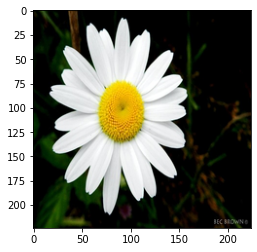

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/gdrive/MyDrive'+'/models/'+'Prediction - Flower.jpg', target_size=(224,224,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(full_model.predict(x))
plt.imshow(img)

Summary:
1. Tried supervised Learning model,ANN, CNN and Transfer learning
2. Trasfer learning model shows best accuracy with predefined weights.
3. though model shows overfitting.

### GUI -APP

In [ ]:
import tkinter 
from tkinter import messagebox,Canvas
from tkinter import filedialog
from PIL import ImageTk,Image  

In [ ]:
import tkinter as tk
import tkinter as ttk
from tkinter import messagebox,Canvas
from tkinter import filedialog
from PIL import ImageTk,Image  

import re
from tensorflow import keras
import os
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

#app window
win=ttk.Tk()
win.geometry("550x300+300+150")
win.resizable(width=True, height=True)
width=win.winfo_screenwidth()
spacer=(" "*(int(width)//8))
win.title(spacer+"Image Classifer GUI- Great Learning")

def fileopenfn():
    global filename
    filename = filedialog.askopenfilename(title='Select image')
    return filename

def open_img():
    x = fileopenfn()
    img = Image.open(x)
    img = img.resize((250, 250), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    panel = tk.Label(win, image=img)
    panel.image = img
    panel.pack()

btn = tk.Button(win, text='Select image', width = 15, command=open_img).pack()
# btn.grid(row=2, column=2, padx=20, pady=20,sticky=tk.W)

def predict_img_class():
    model = keras.models.load_model(os.getcwd()+'\\model\\'+'oxflower17_tf_model.h5')
    x = filename
    img = image.load_img(x, target_size=(224,224,3))
    x1 = image.img_to_array(img)
    x1 = np.expand_dims(x1, axis=0)
    x1 = preprocess_input(x1)    
    score= np.nonzero(model.predict(x1))
    score1=score[1][0]   
    panel = tk.Label(win, text=score1)
    panel.text = score1
    panel.pack()

    

predict=tk.Button(win,text='Predict',width = 15,command=predict_img_class).pack()
# predict.grid(row=20, column=2, padx=20, pady=20,sticky=tk.W)

win.mainloop()

![image-2.png](attachment:image-2.png)
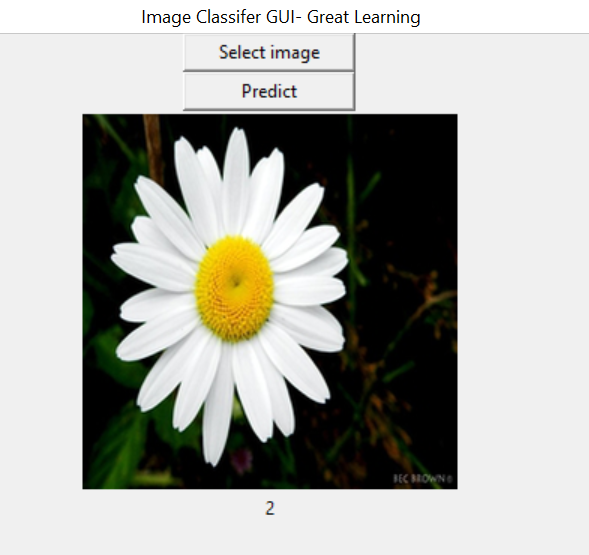

### Explaintion 

• Explain in depth your strategy to maintain and support the AIML image classifier after it in production.
• Explain in depth your strategy to maintain and support the AIML image classifier after it in production.

Explanation :
1. To deploy the model in production, we will need an architecture, to save model and its weight, Inference pipeline & repository and a visulization dashabord for User to check prediction.
2. Once the model gives good accuracy on train and test, that model can be deployed in production.
3. To deploy the model, we will need a repository in production enviornment to save model and its weights.
4. For predictions, we will need a visualization.
5. In backend, based on the requirement, we can schedule a batch prediction or using inference pipeline and rest API can create Real time prediction to be available on dashboard.
6. Will need a pipeline, to share new data to model and pipline to take output from Ml model to visulization
7. Along with inference pipeline, we can also create a maintenance  dashboard to check the performance of the model on regualr basis or at periodic level
8. If model's performance defined by accuracy materices goes down certain threshold then model will need to be revisited if needed it will need to be retrained